# LHII Analysis

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import mdtraj
import itertools

import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
import functools
import time

def timer(func):
        @functools.wraps(func)
        def wrapper_timer(*args, **kwargs):
            start_time = time.perf_counter()
            value = func(*args, **kwargs)
            end_time = time.perf_counter()
            run_time = end_time - start_time
            print(f"Finished {func.__name__!r} in {run_time:4f} secs")
            return value
        return wrapper_timer
            

In [3]:
@timer
def load_dcd_file(dcd_file, top_file):
    return mdtraj.load_dcd(dcd_file, top=top_file)

traj = load_dcd_file("LH2_files/output/trajectory.dcd", "LH2_files/LH2.prmtop")



Finished 'load_dcd_file' in 141.648808 secs


In [4]:
traj

<mdtraj.Trajectory with 5000 frames, 291829 atoms, 64504 residues, and unitcells at 0x1120f8ad0>

In [5]:
top = traj.topology
top

<mdtraj.Topology with 1 chains, 64504 residues, 291829 atoms, 291353 bonds at 0x1120fc750>

[2.9109845e-10 2.4844818e-02 2.1375190e-02 ... 1.7593242e-02 2.1375190e-02
 2.4844818e-02]


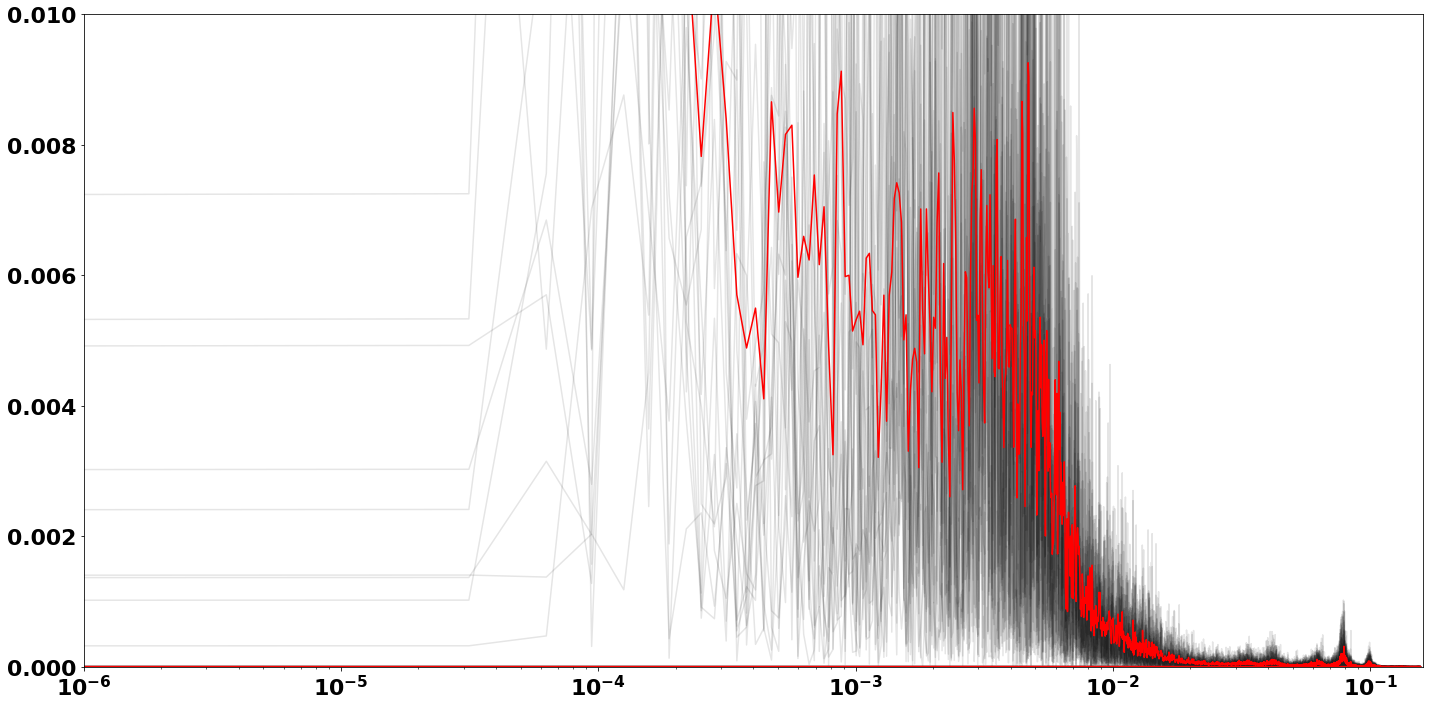

In [97]:
import analysis
from importlib import reload

reload(analysis)

spectra, domain = analysis.Mg_pair_spectral_densities(traj, top)

fig, ax = plt.subplots()

ax.set_xlim(1e-6, 0.16)
ax.set_ylim(0, 0.01)
ax.set_xscale('log')

for i in range(spectra.shape[0]):
    ax.plot(domain, abs(spectra[i]), alpha=0.1, color='black')

avg_spectra = np.mean(abs(spectra), axis=0)

ax.plot(domain, avg_spectra, color='red')

print(avg_spectra)

fig.set_size_inches(24, 12)

 MD length : 0.10 ns, timesteps :   1 fs, highest period : 199.996 ps, lowest period : 2.0 fs
 MD length : 0.10 ns, timesteps :  20 fs, highest period : 199.920 ps, lowest period : 40.0 fs
 MD length : 0.10 ns, timesteps :  50 fs, highest period : 199.800 ps, lowest period : 100.0 fs
 MD length : 0.10 ns, timesteps :  100 fs, highest period : 199.600 ps, lowest period : 200.0 fs
 MD length : 0.10 ns, timesteps :  200 fs, highest period : 199.200 ps, lowest period : 400.0 fs
 MD length : 0.10 ns, timesteps :  500 fs, highest period : 198.000 ps, lowest period : 1000.0 fs
 MD length : 0.10 ns, timesteps :  1000 fs, highest period : 196.000 ps, lowest period : 2000.0 fs
 MD length : 0.20 ns, timesteps :   1 fs, highest period : 399.996 ps, lowest period : 2.0 fs
 MD length : 0.20 ns, timesteps :  20 fs, highest period : 399.920 ps, lowest period : 40.0 fs
 MD length : 0.20 ns, timesteps :  50 fs, highest period : 399.800 ps, lowest period : 100.0 fs
 MD length : 0.20 ns, timesteps :  100 

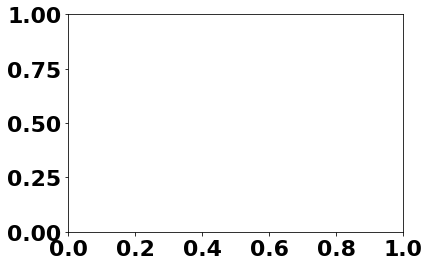

In [79]:
def resolution(length, timestep, cutoff=1):
    autocorr_length = 2 * (length - cutoff) - 2
        
    resolution = 1 / (timestep * autocorr_length)
    
    return resolution


def highest_frequency(timestep):
    return 1/(2*timestep)


fig, ax = plt.subplots()

MD_ns_lengths = np.linspace(0.1, 1, 10)

timesteps = [1, 20, 50, 100, 200, 500, 1000]

max_freqs = [highest_frequency(x) for x in timesteps]

res_mat = np.zeros((len(MD_ns_lengths), len(timesteps)))

for i, ns in enumerate(MD_ns_lengths):
    for j, dt in enumerate(timesteps):

        n_steps = 1e6 * ns / dt

        res, max_freq = resolution(n_steps, dt), highest_frequency(dt)
        
        print(f" MD length : {ns:2.2f} ns, timesteps : {dt : 3.0f} fs, highest period : {1e-3/res:3.3f} ps, lowest period : {1/max_freq} fs") 

In [ ]:
full_rmsd = mdtraj.rmsd(traj, traj, 0)
BCL_rmsd = mdtraj.rmsd(traj, traj, 0, atom_indices = BCL_atom_indices)

In [16]:
log = pd.read_csv("LH2_files/output/log.txt", sep="\t")
log["RMSD"] = full_rmsd
log["BCL RMSD"] = BCL_rmsd

ValueError: Length of values (2624) does not match length of index (4000)

In [13]:
log

#"Progress (%)"   Step  Potential Energy (kJ/mole)  Temperature (K)  \
0               0.0%     10               -2.868276e+06       300.578177   
1               0.1%     20               -2.867977e+06       300.712337   
2               0.1%     30               -2.868144e+06       300.805135   
3               0.1%     40               -2.868425e+06       300.676495   
4               0.1%     50               -2.868008e+06       300.446538   
...              ...    ...                         ...              ...   
3995           99.9%  39960               -2.869814e+06       300.520701   
3996           99.9%  39970               -2.870865e+06       300.675209   
3997          100.0%  39980               -2.868822e+06       299.869208   
3998          100.0%  39990               -2.868310e+06       299.991418   
3999          100.0%  40000               -2.869835e+06       300.595353   

      Speed (ns/day)  
0              0.000  
1              0.483  
2              0.431  
3              0.444  
4              0.443  
...              ...  
3995           0.448  
3996           0.448  
3997           0.448  
3998           0.448  
3999           0.448  

[4000 rows x 5 columns]

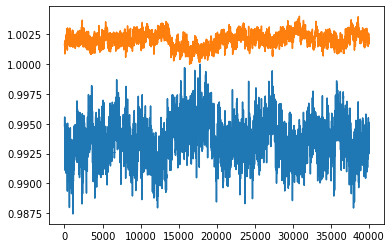

In [14]:
fig, ax = plt.subplots()

ax.plot(log.Step, log["Temperature (K)"]/max(log["Temperature (K)"]))
ax.plot(log.Step, log["Potential Energy (kJ/mole)"]/max(log["Potential Energy (kJ/mole)"]))

KeyError: 'RMSD'

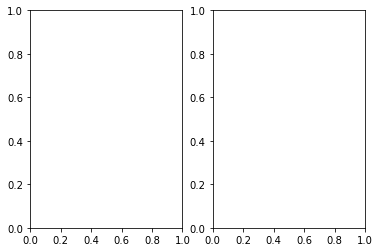

In [15]:
fig, ax = plt.subplots(1, 2)

log.plot("Step", "RMSD", ax=ax[0])
log.plot("Step", "BCL RMSD", ax=ax[1])

fig.set_size_inches(24, 12)